# Titanic Solution Using Speedml API

### This notebook uses the [Speedml](https://speedml.com)  Python package to speed start machine learning projects.

In [43]:
from speedml import Speedml

In [44]:
sml = Speedml('../input/titanic/train.csv', 
              '../input/titanic/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')

In [45]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Null Values,1014,Aim for zero nulls.
#Samples Train,891,Much larger than #Features to avoid over-fitting.
#Samples Test,418,Cannot drop Test samples.
#Features,11,Compare with n=count during feature selection.
Numerical over Text,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Engineer with density method.
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Violin plots for outliers.
Numerical Continuous,[],~90% unique. Scatter plots for outliers.
Text High-cardinality,"[Cabin, Ticket]",(>10) categories. Labels to numeric.


In [46]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


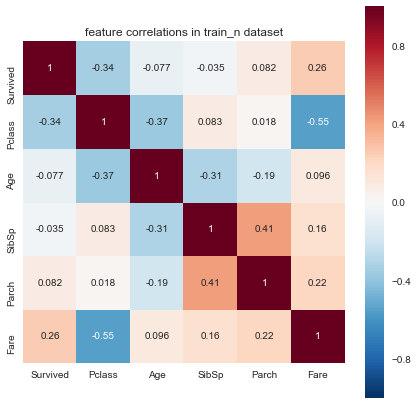

In [47]:
sml.plot.correlate()

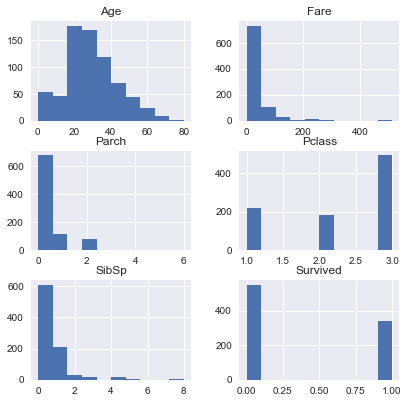

In [48]:
sml.plot.distribute()

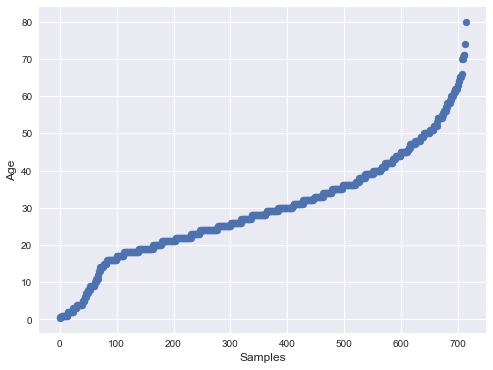

In [49]:
sml.plot.continuous('Age')

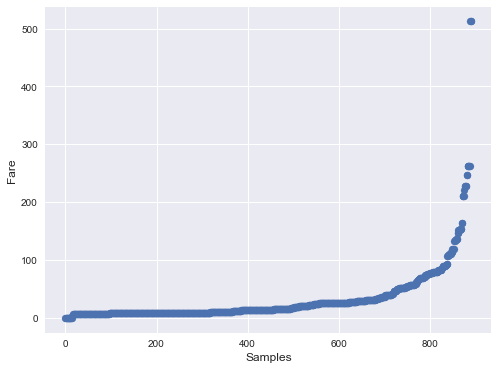

'Fixed 9 or 1.01% upper outliers. '

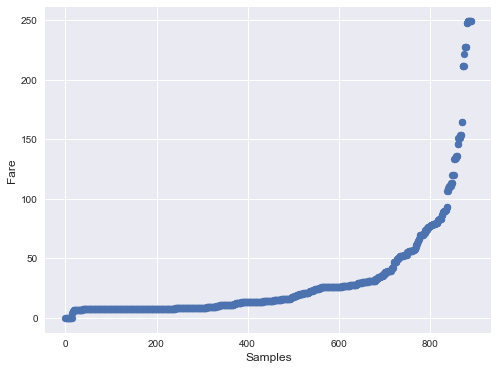

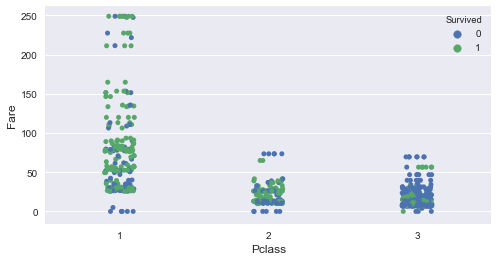

In [50]:
sml.plot.continuous('Fare')
sml.feature.outliers('Fare', upper=99)
sml.plot.continuous('Fare')
sml.plot.strip('Pclass', 'Fare')

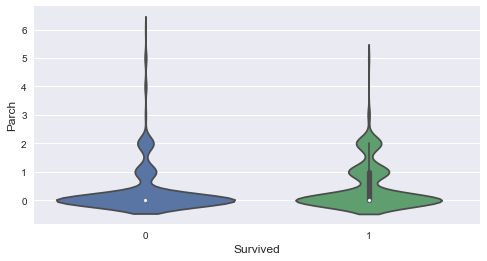

Fixed 6 or 0.67% upper outliers. 


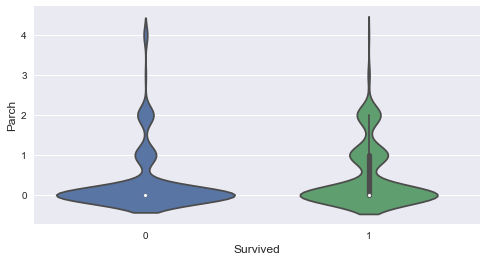

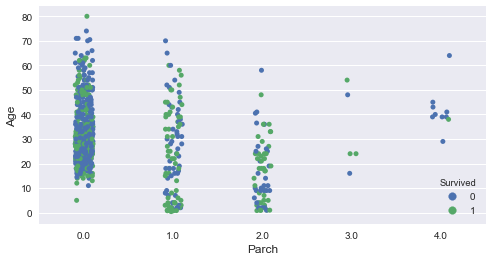

In [51]:
sml.plot.ordinal('Parch')
print(sml.feature.outliers('Parch', upper=99))
sml.plot.ordinal('Parch')
sml.plot.strip('Parch', 'Age')

In [52]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Null Values,1014,Aim for zero nulls.
#Samples Train,891,Much larger than #Features to avoid over-fitting.
#Samples Test,418,Cannot drop Test samples.
#Features,11,Compare with n=count during feature selection.
Numerical over Text,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Engineer with density method.
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Violin plots for outliers.
Numerical Continuous,[],~90% unique. Scatter plots for outliers.
Text High-cardinality,"[Cabin, Ticket]",(>10) categories. Labels to numeric.


In [53]:
sml.feature.density(['Age', 'Ticket'])
sml.train[['Age', 'Age_density', 'Ticket', 'Ticket_density']].head()
sml.feature.drop(['Ticket'])

,Age,Age_density,Ticket,Ticket_density
0,22.0,27,A/5 21171,1
1,38.0,11,PC 17599,1
2,26.0,18,STON/O2. 3101282,1
3,35.0,18,113803,2
4,35.0,18,373450,1


'Dropped 1 features with 12 features available.'

In [54]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [55]:
sml.plot.crosstab('Survived', 'Parch')

Parch,0.0,1.0,2.0,3.0,4.0
Survived,,,,,
0,445,53,40,2,9
1,233,65,40,3,1


In [56]:
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.feature.drop(['Cabin'])
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
sml.feature.add('FamilySize', 1)

'Filled 1014 null values across test and train datasets.'

'Dropped 1 features with 12 features available.'

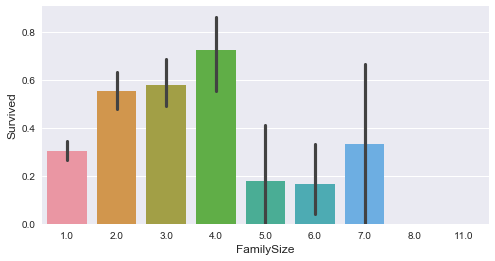

In [57]:
sml.plot.bar('FamilySize', 'Survived')

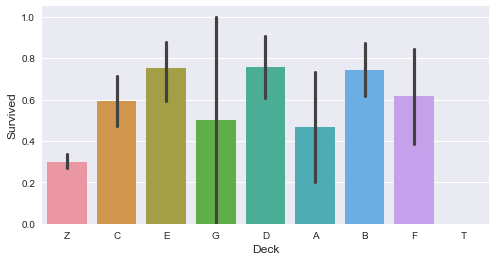

In [58]:
sml.plot.bar('Deck', 'Survived')

In [59]:
sml.feature.drop(['Parch', 'SibSp'])

'Dropped 2 features with 11 features available.'

In [60]:
sml.feature.impute()

'Imputed 179 empty values to 0.'

In [61]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Age               891 non-null float64
Age_density       891 non-null int64
Deck              891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null float64
Fare              891 non-null float64
Name              891 non-null object
Pclass            891 non-null int64
Sex               891 non-null int64
Survived          891 non-null int64
Ticket_density    891 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Age               418 non-null float64
Age_density       418 non-null int64
Deck              418 non-null object
Embarked          418 non-null object
FamilySize        418 non-null float64
Fare              418 non-null float64
Name              418 non-null object
Pc

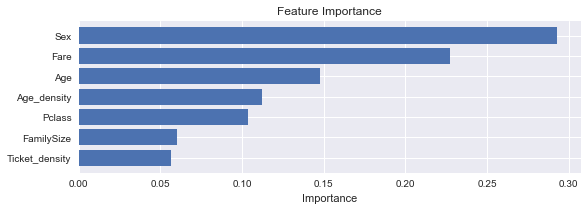

In [62]:
sml.plot.importance()

In [63]:
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived,Ticket_density
0,22.0,27,Z,S,2.0,7.2500,"Braund, Mr. Owen Harris",3,0,0,1
1,38.0,11,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1
2,26.0,18,Z,S,1.0,7.9250,"Heikkinen, Miss. Laina",3,1,1,1
3,35.0,18,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,2
4,35.0,18,Z,S,1.0,8.0500,"Allen, Mr. William Henry",3,0,0,1


In [64]:
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [65]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')
sml.feature.replace('Title', 'Mlle', 'Miss')
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')

'Replaced matching list of strings across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 1 matching values across train and test datasets.'

In [66]:
sml.train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [67]:
sml.feature.drop(['Name'])
sml.feature.labels(['Title', 'Embarked', 'Deck'])
sml.train.head()

'Dropped 1 features with 11 features available.'

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Ticket_density,Title
0,22.0,27,8,2,2.0,7.2500,3,0,0,1,2
1,38.0,11,2,0,2.0,71.2833,1,1,1,1,3
2,26.0,18,8,2,1.0,7.9250,3,1,1,1,1
3,35.0,18,2,2,2.0,53.1000,1,1,1,2,3
4,35.0,18,8,2,1.0,8.0500,3,0,0,1,2


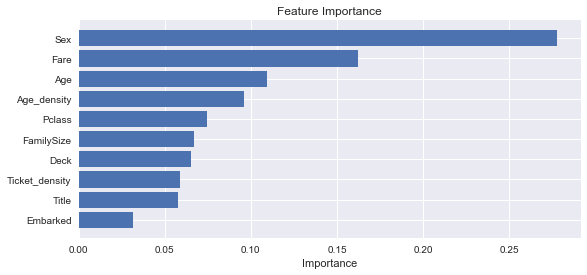

In [68]:
sml.plot.importance()

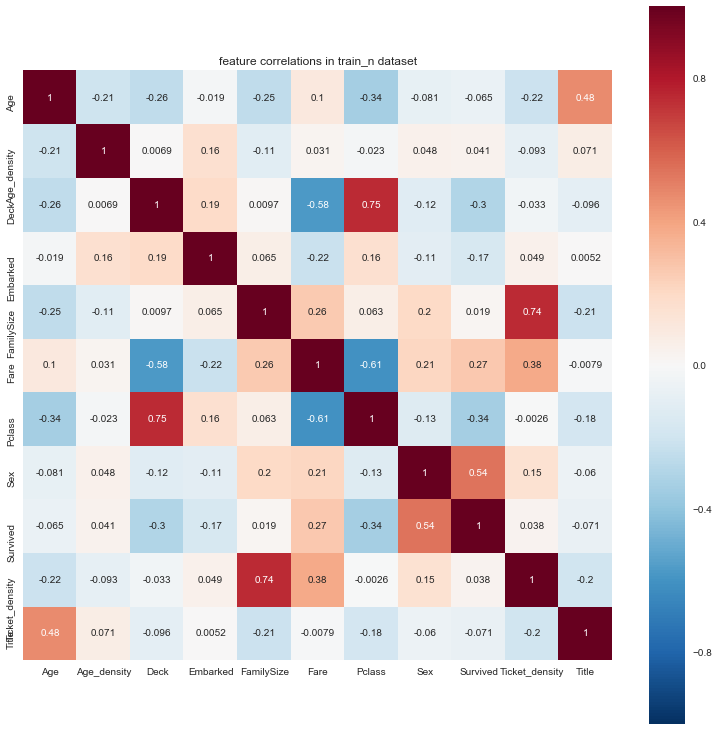

In [69]:
sml.plot.correlate()

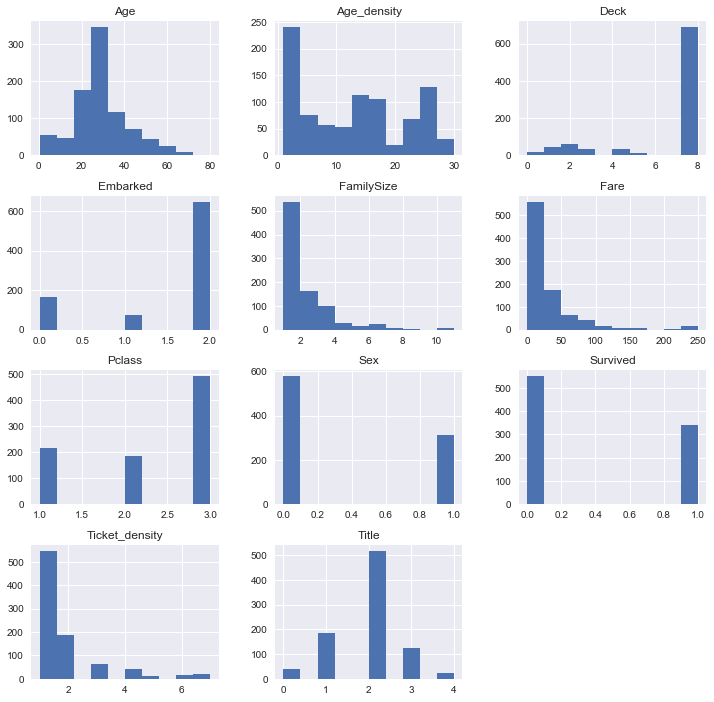

In [70]:
sml.plot.distribute()

In [71]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Null Values,0,Aim for zero nulls.
#Samples Train,891,Much larger than #Features to avoid over-fitting.
#Samples Test,418,Cannot drop Test samples.
#Features,11,Compare with n=count during feature selection.
Numerical over Text,100%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Engineer with density method.
Numerical Categorical,"[Deck, Embarked, FamilySize, Pclass, Sex, Surv...",Violin plots for outliers.
Numerical Continuous,[],~90% unique. Scatter plots for outliers.
Target Analysis (Survived),Model ready.,Use classification models.


In [72]:
sml.model.data()

'train_X: (891, 10) train_y: (891,) test_X: (418, 10)'

In [73]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

,rank,params
0,1,"{'max_depth': 3, 'min_child_weight': 1}"
4,2,"{'max_depth': 5, 'min_child_weight': 3}"
8,2,"{'max_depth': 7, 'min_child_weight': 5}"
1,4,"{'max_depth': 3, 'min_child_weight': 3}"
2,4,"{'max_depth': 3, 'min_child_weight': 5}"
3,4,"{'max_depth': 5, 'min_child_weight': 1}"
5,4,"{'max_depth': 5, 'min_child_weight': 5}"
7,8,"{'max_depth': 7, 'min_child_weight': 3}"
6,9,"{'max_depth': 7, 'min_child_weight': 1}"


In [74]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth': 3, 'min_child_weight': 1, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

,rank,params
4,1,"{'learning_rate': 0.1, 'subsample': 0.8}"
3,2,"{'learning_rate': 0.1, 'subsample': 0.7}"
5,2,"{'learning_rate': 0.1, 'subsample': 0.9}"
0,4,"{'learning_rate': 0.3, 'subsample': 0.7}"
1,5,"{'learning_rate': 0.3, 'subsample': 0.8}"
2,6,"{'learning_rate': 0.3, 'subsample': 0.9}"
7,7,"{'learning_rate': 0.01, 'subsample': 0.8}"
8,7,"{'learning_rate': 0.01, 'subsample': 0.9}"
6,9,"{'learning_rate': 0.01, 'subsample': 0.7}"


In [75]:
tuned_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'max_depth': 3, 'min_child_weight': 1,
                'seed':0, 'colsample_bytree': 0.8, 
                'objective': 'binary:logistic'}
sml.xgb.cv(tuned_params)

In [76]:
sml.xgb.cv_results.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
44,0.169663,0.008257,0.130337,0.005285
45,0.169663,0.007453,0.130056,0.005519
46,0.168539,0.006154,0.127247,0.007249
47,0.169663,0.006552,0.126685,0.007610
48,0.166292,0.005729,0.127528,0.006960


In [77]:
tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0] - 1
sml.xgb.params(tuned_params)

,Classifier,Accuracy
0,XGBClassifier,0.833333
0,GradientBoostingClassifier,0.830000
0,AdaBoostClassifier,0.822222
0,RandomForestClassifier,0.814444
0,DecisionTreeClassifier,0.797778
0,LogisticRegression,0.785556
0,GaussianNB,0.776667
0,SVC,0.712222
0,KNeighborsClassifier,0.704444


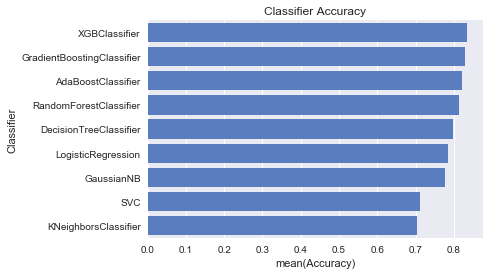

In [78]:
sml.xgb.classifier()
sml.model.evaluate()
sml.plot.model_ranks()
sml.model.ranks()

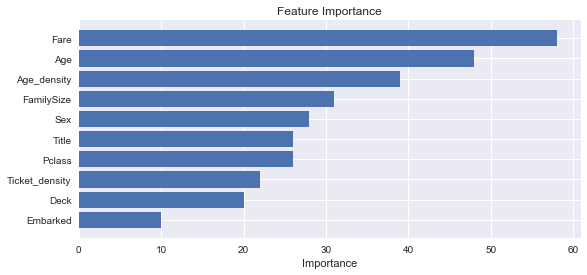

Accuracy: 78.730000%
Thresh=0.038, n=10, Accuracy: 78.73%
Thresh=0.042, n=9, Accuracy: 78.36%
Thresh=0.058, n=8, Accuracy: 77.24%
Thresh=0.066, n=7, Accuracy: 76.87%
Thresh=0.068, n=6, Accuracy: 76.12%
Thresh=0.073, n=5, Accuracy: 76.12%
Thresh=0.086, n=4, Accuracy: 68.28%
Thresh=0.097, n=3, Accuracy: 69.03%
Thresh=0.186, n=2, Accuracy: 69.40%
Thresh=0.286, n=1, Accuracy: 69.40%


In [79]:
sml.xgb.fit()
sml.xgb.predict()
sml.plot.xgb_importance()
sml.xgb.feature_selection()

In [80]:
sml.xgb.sample_accuracy()

'Accuracy = 86.53%. Found 771 correct of 891 total labels'

In [81]:
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='output/titanic-speedml-{}.csv'.format(sml.slug()))
sml.slug()

'Results saved.'

'e16.63-m83.33-s86.53-f78.73'